<a href="https://colab.research.google.com/github/Hentonybarboza/MNIST/blob/main/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Treinando um classificador binário

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

# Importando os dados

In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [40]:
X, y = mnist['data'], mnist['target'] #Definindo X e y

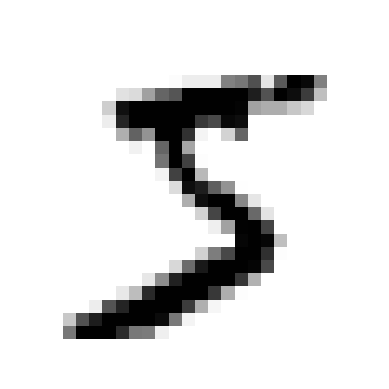

In [41]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [42]:
y= y.astype(np.uint8) #convertendo y para inteiro
y[0]

5

#Separando em conjunto de treino e testa






In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Treinamento

In [44]:
y_train_5 = (y_train == 5) #selecionando somes o número 5 nos dados de treino e tese
y_test_5 = (y_test == 5)

In [80]:
from sklearn.linear_model import SGDClassifier # O SGD depende da aleatoriedade por isso para resultados
sgd_clf = SGDClassifier(random_state=2)       # Reproduzives é importante definir um random state
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=2)

In [81]:
sgd_clf.predict([some_digit])

array([ True])

#Cálculo de desempenho

### Validação cruzada

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring='accuracy')

array([0.9636 , 0.96275, 0.9657 ])

### Matriz de confusão


In [83]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv= 3)

In [84]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train_5, y_train_pred)
conf_mat



array([[53939,   640],
       [ 1519,  3902]])

In [85]:
#calcular a precisão
precision = conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1])
precision

0.8590929106120652

In [86]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)


0.8590929106120652

In [87]:
recall_score(y_train_5, y_train_pred)

0.7197933960523889

In [89]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7832982033524039